# Behavioral Patterns

The behavioral patterns are guidelines suggested to create classes that allows to communicate objects to each other. The goal of the behavioral patterns is to make those interactions easier and more understandable.

The five creational patterns available are:
1. Chain of Responsability
2. Command
3. Iterator
4. Mediator
5. Memento
6. Observer
7. State
8. Strategy
9. Template method
10. Visitor

Again, we are going to be convering eaach of the possible patterns and making some examples in the context of machine learning engineering.

# Command

**What is a command?**

This is a design pattern that aims to act in the middle of two systems. Instead of calling the second system directly from the first system, the command acts in the middle to save the request for the first system as an object.

**When should we use it?**

The command is used when you're running models in spot instances or environments that execution might fail ocasionally. This will serve as a cache to save all the execution requirements and retry later.

For the machine learning engineering context, this can be also useful to register all information related to experiments and reduce the overhead with tools such as mlflow.

**Analogy**

If you're in a restaurant; instead of telling everything you need to the chef step by step, a waiter takes notes of everything you want *(request as object)*. Once you completed your order, the waiter will give to the chef your order *(request)*. After some time, when your food is ready, the waiter will give you your food *(response)*.

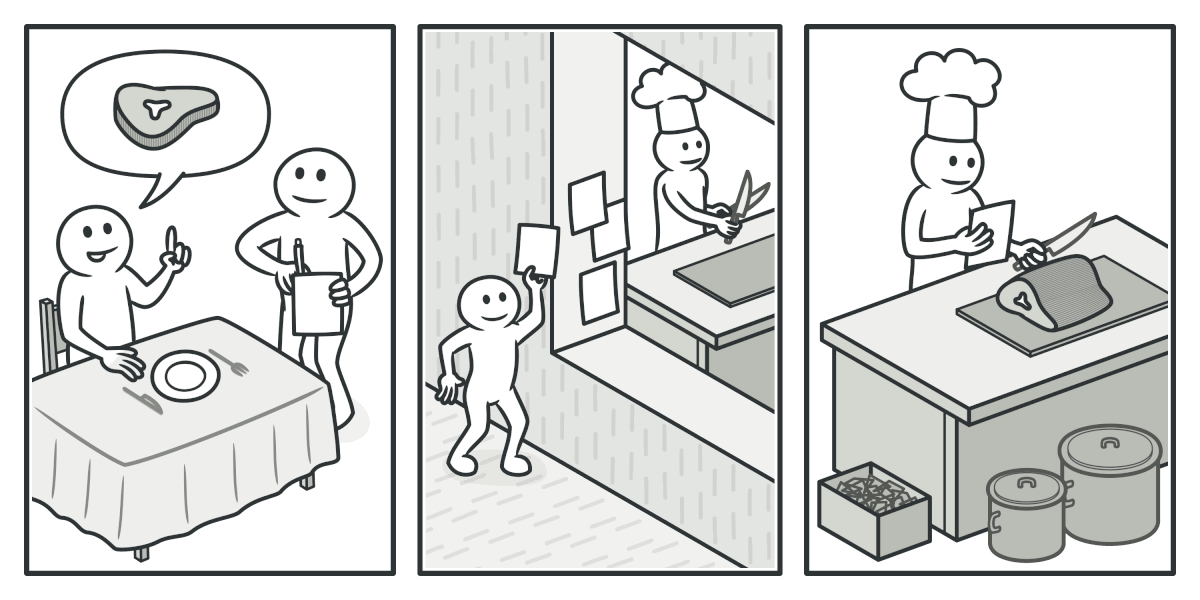

Reference: https://refactoring.guru/design-patterns/chain-of-responsibility

**Scenario**

You're a lead machine learning engineer. You're are running out of money, so you need to save resources as much as possible. The technology department is only offering sport instances for model execution in AWS EC2. You need to create a reliable solution for this.

Consider the following pipeline as an example:

In [1]:
import numpy as np
import pandas as pd

This will be my dummy pipeline for execution

In [11]:
class MLPipeline:
    def __init__(self):
        pass

    def fit(
        self,
        df: pd.DataFrame,
        data_transformation: str,
        feature_selection_technique: str,
        model_type: str,
    ) -> None:
        self._transform_data(df, data_transformation)
        self._select_features(df, feature_selection_technique)
        self._training_model(df, model_type)

    def _transform_data(self, df: pd.DataFrame, technique: str) -> pd.DataFrame:
        print(f"Transforming data using {technique} technique.")
        return df

    def _select_features(self, df: pd.DataFrame, technique: str) -> pd.DataFrame:
        print(f"Selecting features using {technique} technique.")
        return df

    def _training_model(self, df: pd.DataFrame, model_type: str) -> None:
        print(f"Training model of type {model_type}.")

    def predict(self) -> np.ndarray:
        print("Making a wonderful prediction!")

In the front, we will have an API designated to give into our pipeline what we need for their execution

In [12]:
class PipelineAPI:
    def __init__(self):
        self.pipeline = MLPipeline()

    def post(self, request: dict) -> None:
        self.pipeline.fit(
            None,
            request["data_transformation"],
            request["feature_selection_technique"],
            request["model_type"],
        )
        predictions = self.pipeline.predict()
        return predictions

## Antipattern

The easiest antipattern to do here is as simple, as you can thing. Which one? Only executing the API and waiting that everything works magically and if it fails retry manually. What a mess right?

In [13]:
api = PipelineAPI()

In [14]:
request = {
    "path": "data.csv",
    "data_transformation": "normalization",
    "feature_selection_technique": "PCA",
    "model_type": "random_forest",
}

In [15]:
api.post(request)

Transforming data using normalization technique.
Selecting features using PCA technique.
Training model of type random_forest.
Making a wonderful prediction!


It worked!!! However, this is not completely true, it worked only because it was a dummy pipeline. In real setups, it can fail during the execution because we can miss the spot instance?

**How to solve the antipattern created?**

1. We can create a command class
2. Cache the results in a file system storage services (S3, Blob Storage, Cloud Storage).
3. Implement an automatic retry class/method -> Out of scope for this class.

## Pattern

In [16]:
class PipelineCommand:
    def __init__(self):
        pass

    def execute(self, request: dict) -> None:
        api = PipelineAPI()
        self.saving_data_request(request)
        api.post(request)

    def saving_data_request(self, request: dict) -> None:
        print("Saving data into S3 as a backup.")

In [18]:
command = PipelineCommand()
command.execute(request)

Saving data into S3 as a backup.
Transforming data using normalization technique.
Selecting features using PCA technique.
Training model of type random_forest.
Making a wonderful prediction!


As you saw previously, the command allows to execute the API, but in this case before moving on, we save the data into a file system in case, it can fail to retry in the future.